# <a id="#">Task 4 – Edge detection: Derivative operators</a>

In [1]:
import numpy
import matplotlib.pyplot as plt

---

## Prewitt filters

**<a id="#">Task 4.1.1.</a>** Load the image `data/lena.png` and show it:

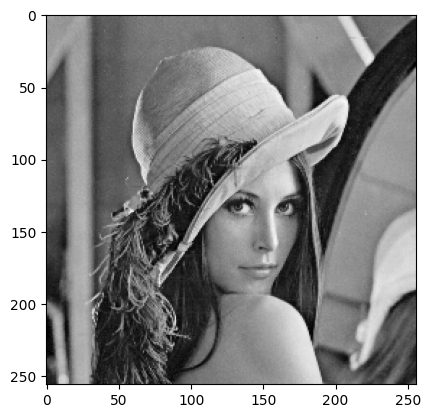

In [4]:
lena=plt.imread('data/lena.png')
plt.imshow(lena, 'grey')

**<a id="#">Task 4.1.2.</a>** Implement horizontal and vertical $3 \times 3$ Prewitt filters:

In [10]:
def prewitt_h(img):
    result = img.copy()
    for p in numpy.ndindex(img.shape):
        if p[0]<1 or p[1]<1 or p[0]>=(img.shape[0]-1) or p[1]>=(img.shape[1]-1) :
            result[p] = 0
        else:
            sum = 0
            sum += img[p[0]-1:p[0]+2,p[1]+1].sum()
            sum -= img[p[0]-1:p[0]+2,p[1]-1].sum()
            result[p] = sum/6
    return result
    
def prewitt_v(img):
    result = img.copy()
    for p in numpy.ndindex(img.shape):
        if p[0]<1 or p[1]<1 or p[0]>=(img.shape[0]-1) or p[1]>=(img.shape[1]-1) :
            result[p] = 0
        else:
            sum = 0
            sum += img[p[0]+1,p[1]-1:p[1]+2].sum()
            sum -= img[p[0]-1,p[1]-1:p[1]+2].sum()
            result[p] = sum/6
    return result

**<a id="#">Task 4.1.3.</a>** Test your above solution using the functions `prewitt_h` and `prewitt_v` for the previously loaded image and show the result:

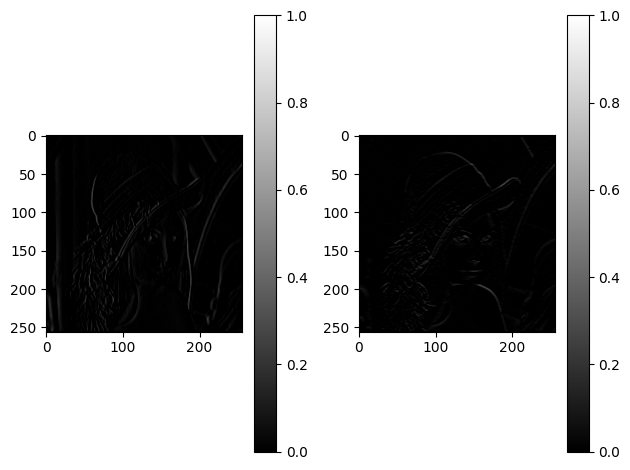

In [11]:
lena_h = prewitt_h(lena)
lena_v = prewitt_v(lena)

plt.subplot(1, 2, 1)
plt.imshow(lena_h, 'gray', vmin=0, vmax=1)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(lena_v, 'gray', vmin=0, vmax=1)
plt.colorbar()

plt.tight_layout()

**<a id="#">Task 4.1.4.</a>** Compare your results with the correct result image `data/lena_prewitt_h.tiff` and `data/lena_prewitt_v.tiff`:

In [15]:
import skimage.io
correctlena_h = skimage.io.imread('data/lena_prewitt_h.tiff')
correctlena_v = skimage.io.imread('data/lena_prewitt_v.tiff')
assert numpy.allclose(lena_h, correctlena_h, atol=1/255)
assert numpy.allclose(lena_v, correctlena_v, atol=1/255)

---

## Edge detection

**<a id="#">Task 4.2.1.</a>** Use your results from **Task 4.1.2 – 4.1.3** to compute the *gradient magnitude* of the image:

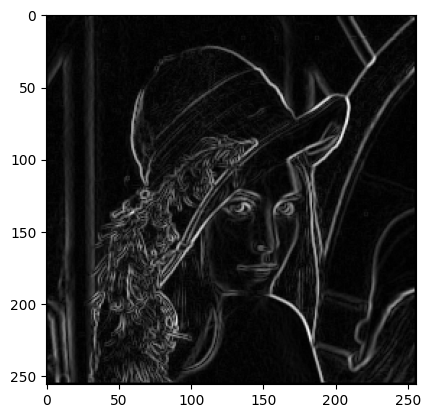

In [16]:
lena_magnitude = numpy.sqrt(lena_h**2 + lena_v**2)
plt.imshow(lena_magnitude, 'grey')

**<a id="#">Task 4.2.2.</a>** Compare your result with the correct result image `data/lena_prewitt_gradmag.tiff`:

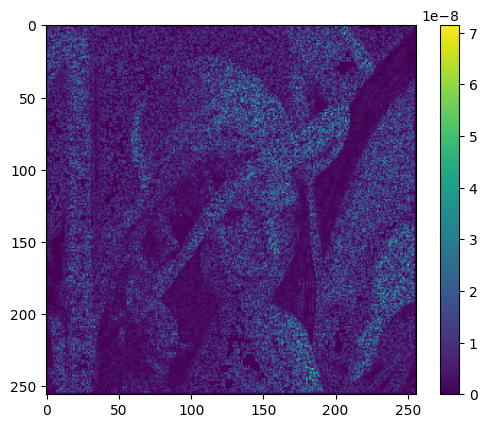

In [21]:
correctlena_magnitude = skimage.io.imread('data/lena_prewitt_gradmag.tiff')
diff = numpy.abs (lena_magnitude-correctlena_magnitude)
plt.figure()
plt.imshow(diff)
plt.colorbar()
assert numpy.allclose(lena_magnitude, correctlena_magnitude, atol=1/255)

---

## Sobel filters (bonus)

**<a id="#">Task 4.3.1.</a>** Implement the two functions `sobel_h` and `sobel_v` for horizontal and vertical $3 \times 3$ Sobel filtering, respectively:

In [23]:
def sobel_h(img):
    result = img.copy()
    for p in numpy.ndindex(img.shape):
        if p[0]<1 or p[1]<1 or p[0]>=(img.shape[0]-1) or p[1]>=(img.shape[1]-1) :
            result[p] = 0
        else:
            sum = 0
            sum += (img[p[0]-1,p[1]+1] + 2*img[p[0],p[1]+1] + img[p[0]+1,p[1]+1])
            sum -= (img[p[0]-1,p[1]-1] + 2*img[p[0],p[1]-1] + img[p[0]+1,p[1]-1])
            result[p] = sum/8
    return result
    
def sobel_v(img):
    result = img.copy()
    for p in numpy.ndindex(img.shape):
        if p[0]<1 or p[1]<1 or p[0]>=(img.shape[0]-1) or p[1]>=(img.shape[1]-1) :
            result[p] = 0
        else:
            sum = 0
            sum += (img[p[0]+1,p[1]-1] + 2*img[p[0]+1,p[1]] + img[p[0]+1,p[1]+1])
            sum -= (img[p[0]-1,p[1]-1] + 2*img[p[0]-1,p[1]] + img[p[0]-1,p[1]+1])
            result[p] = sum/8
    return result

**<a id="#">Task 4.3.2.</a>** Test your above solution using the functions `sobel_h` and `sobel_v` for the previously loaded image and show the result:

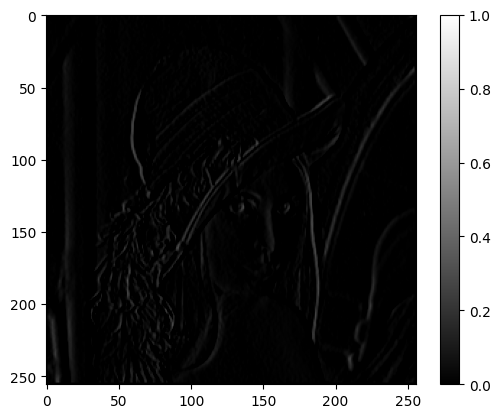

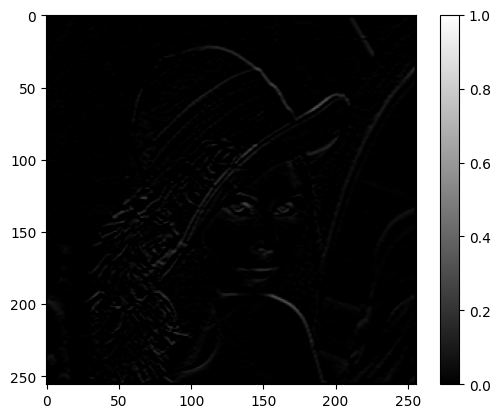

In [24]:
lena_hsobel = sobel_h(lena)
lena_vsobel = sobel_v(lena)

plt.figure()
plt.imshow(lena_hsobel, 'gray', vmin=0, vmax=1)
plt.colorbar()

plt.figure()
plt.imshow(lena_vsobel, 'gray', vmin=0, vmax=1)
plt.colorbar()

**<a id="#">Task 4.3.3.</a>** Compare your results with the correct result image `data/lena_sobel_h.tiff` and `data/lena_sobel_v.tiff`:

In [ ]:
correctlena_hsobel = skimage.io.imread('data/lena_sobel_h.tiff')
correctlena_vsobel = skimage.io.imread('data/lena_sobel_v.tiff')
assert numpy.allclose(lena_hsobel, correctlena_hsobel, atol=1/255)
assert numpy.allclose(lena_vsobel, correctlena_vsobel, atol=1/255)